# Исследование продаж компьютерных игр интернет-магазина "Стримчик"

Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# 1. Изучение данных таблицы

In [1]:
import pandas as pd #запуск библиотеки Pandas

In [2]:
import matplotlib.pyplot as plt#открытие библиотеки matplotlib для построения графиков

In [3]:
data = pd.read_csv('/datasets/games.csv')

In [4]:
data.head(20)#открытие первых 20 строк датафрейма

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Таблица состоит из 11 столбцов. При выведении 20 первых строк таблицы можно увидеть пропущенных значения в данных, тип данных float в столбце 'Year_of_Release'. Необходимо провести подготовку данных для анализа.

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


5 столбцов имеют значения str(object), остальные столбцы имеют тип данных float.

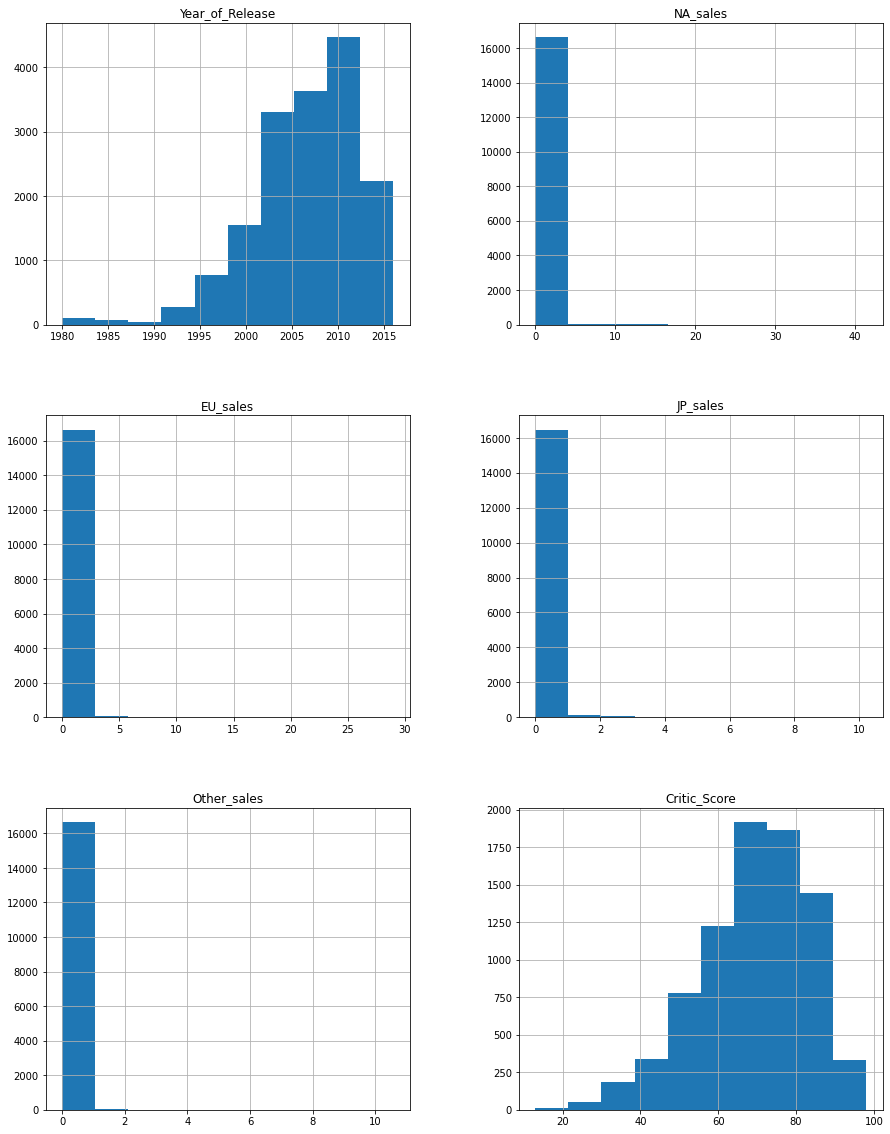

In [6]:
# построение гистграммы для всех числовых значений DataFrame
data.hist(figsize=(15, 20))
plt.show()

In [7]:
#информация о сумме пропущенных значений
print('Количество пропущенных значений:', data.isnull().sum().sum ())

Количество пропущенных значений: 22318


In [8]:
#информация о количестве дубликатов
print('Количество дубликатов значений:' , data.duplicated().sum())

Количество дубликатов значений: 0


In [9]:
#Количество пропущенных значений в различных столбцах Датафрейма
print(data.isnull().sum()) 

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


In [10]:
print(data['User_Score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Таблица состоит из 11 столбцов.В столбцах наименования игры, оценка критиков и оценка пользователей, а также рейтинг организации имеются пропущенные значения.Количество дубликатов ноль. Количество пропущенных значений 22318. 5 столбцов имеют значения str(object), остальные столбцы имеют тип данных float. В уникальных значениях столбца 'User_Score'  значение 'tbd'в переводе означает, что данное значение подлежит уточнению или в настоящее время не определено. Пропущенные значения возникли из-за того, что данные за 2016 год могут быть неполными(см. Описание проекта)

# Обработка данных 

In [11]:
 print(data['Critic_Score'].unique())# вывод уникальных значений столбца оценки критиков

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


Вывод уникальных значений показал, что можно заменить оценку критиков к целочисленному типу данных.

In [12]:
data['Critic_Score'] = data['Critic_Score'].astype('Int64')#замена на целочисленный вид данных столбца оценки критиков
data['Year_of_Release'] = data['Year_of_Release'].astype('Int64')#замена на целочисленный вид данных столбца год реализации игры

In [13]:
import numpy as np
data['User_Score'] = data['User_Score'].replace('tbd', np.nan)#замена  значения столбца 'tbd' на пропущенное значение

In [14]:
data['User_Score'] = data['User_Score'].fillna(-10.0).astype('float64')

Установление значение заглушки в столбце 'User_Score' для проведения исследовательского анализа данных

In [15]:
#удаление аномального значения столбца равное 0.
data = data.loc[data['User_Score'] != 0]

In [16]:
def type_of_user_evaluation(row):
    User_Score = row['User_Score']
    if User_Score < 5.0:
        return 'D'
    if 5.1 < User_Score < 7.0:
        return 'C'
    if 7.1 < User_Score < 8.0:
        return 'B'
    if  User_Score > 8.1:
        return 'A'
data['type_user_score'] = data.apply(type_of_user_evaluation, axis=1)

In [17]:
data['Critic_Score'] = data['Critic_Score'].fillna(-999.0).astype('float64')

Установление значение заглушки в столбце 'Critic_Score' для проведения исследовательского анализа данных

In [18]:
#приведение наименований столбцов к нижнему регистру
data.columns = map(str.lower, data.columns)

In [19]:
data.dropna(subset=['name', 'genre', 'year_of_release'], inplace=True)

In [20]:
data['rating'] = data['rating'].fillna('unknown')

Пропущенные данные были заменены в столбцах с рейтингом ассоциации  на значение 'unknown'(неизвестно). Замена произошла для категориальных значений. Установление значение заглушки в столбцaх 'User_Score','Critic_Score' для проведения исследовательского анализа данных. Удаление пропуско в столбцах о наименовании игры, жанре, годе реализации игры в виду малозначительности пропусков.

In [21]:
#создание нового столбца 'sale_in_all_regions' для суммирования всех продаж по регионам.
data['sale_in_all_regions'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Пропущенные данные были заменены в столбцах с рейтингом ассоциации на значение 'unknown'(неизвестно). Замена произошла для категориальных значений. Установление значение заглушки в столбцaх 'User_Score','Critic_Score' для проведения исследовательского анализа данных. Удаление пропуско в столбцах о наименовании игры, жанре, годе реализации игры в виду малозначительности пропусков.Замена наименований столбцов к нижнему регистру.

# 3.Исследовательский анализ данных

# 3.1 Параметр  'ГОД РЕАЛИЗАЦИИ ИГРЫ'

count    16443.000000
mean      2006.486164
std          5.875692
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64


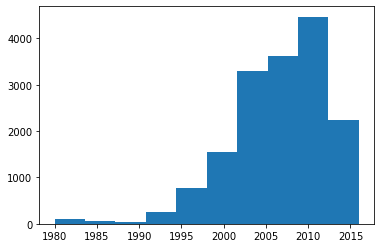

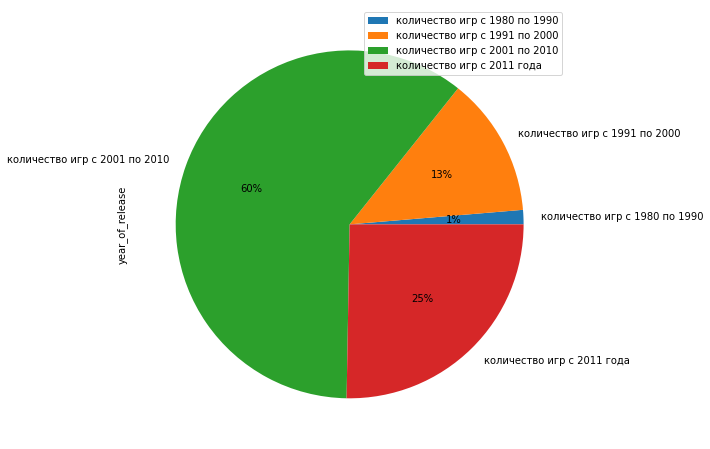

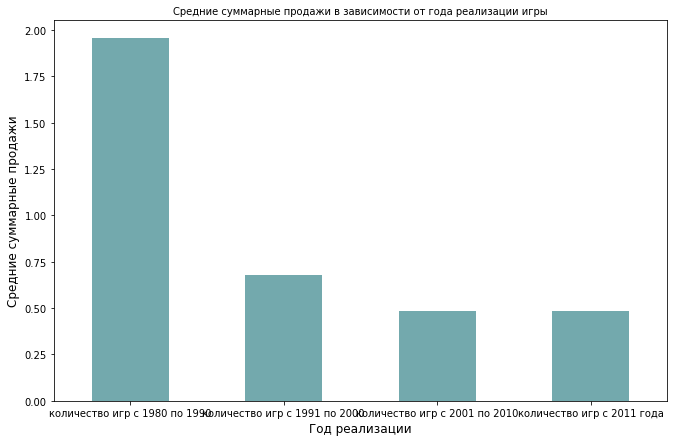

<AxesSubplot:xlabel='temporary_segment'>

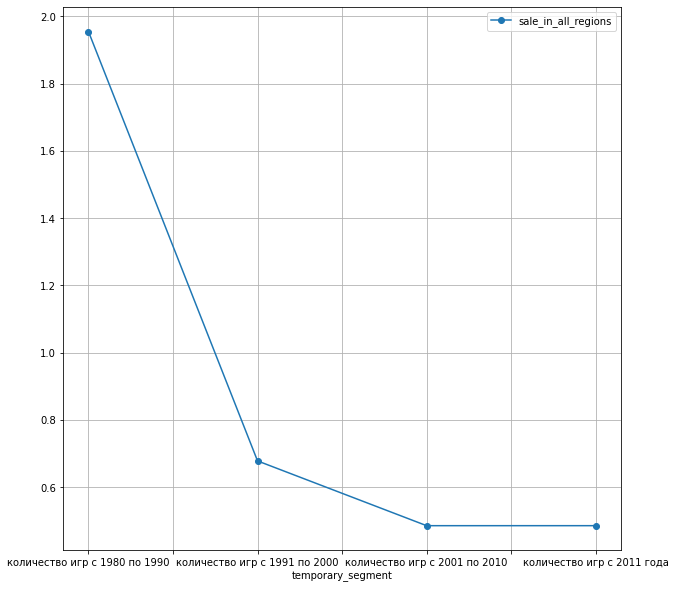

In [22]:
#построение гистограммы распределния количесмтва игр по временной реализации(1980-2016 гг)
plt.hist(data['year_of_release'], bins=10, range=(1980, 2016))

#Выведение общих статистических значений столбца 'Year_of_Release'
print(data['year_of_release'].describe())

#Создание собственнной функции для построения диаграммы процентного соотношения
def the_number_of_games_distributed_over_time_intervals(row):
    Year_of_Release = row['year_of_release']
    if 1980 < Year_of_Release <= 1990:
        return 'количество игр с 1980 по 1990'
    if 1991 < Year_of_Release <= 2000:
        return 'количество игр с 1991 по 2000'
    if 2001 < Year_of_Release <= 2010:
        return 'количество игр с 2001 по 2010'
    if  Year_of_Release >= 2011:
        return 'количество игр с 2011 года'
data['temporary_segment'] = data.apply(the_number_of_games_distributed_over_time_intervals, axis=1)

#Создание сводной таблицы количества игр в каждом временном сегменте по десятилетиям
temporary = data.pivot_table(index ='temporary_segment', values = 'year_of_release' ,  aggfunc = 'count')
temporary.plot(y = 'year_of_release' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')#создание диаграммы количества игр в сводной таблице с процентным соотношением

plt.show()
data.groupby('temporary_segment')['sale_in_all_regions'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в зависимости от года реализации игры', size=10)
plt.xlabel('Год реализации', size=12)
plt.ylabel('Средние суммарные продажи', size=12)

plt.show()
data.pivot_table(index='temporary_segment', values='sale_in_all_regions').plot(grid=True, style='o-', figsize=(10,10))


При данных гистограммы можно увидеть, что наибольшее количество игр, выпускалось с 2008 по 2012 год(примерное значение, так как 269  пропущенных значений были заменены). При этом при распределении количества игр по десятилетиям с 2001 по 2010 гг.(60%), а количество игр, выпущенных с 2011 года составило 25%. Наименьшее количество игр, выпускались с 1980 по 1990 г.(1%). При этом исходя из данных гистограммы, был подъём в течении 2-3 лет, начиная с 1980 года.
При этом большее количество продаж от реализации игр и  и количеством игр года реализации противоположна. Наибольшее количество прибыли происходило в первое десятилети с момента реализации игр(1980-1990 гг)Потом происходило резкое снижение прибыли, несмотря на большее количество выпускаемых игр.

# 3.2 Параметр платформы

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


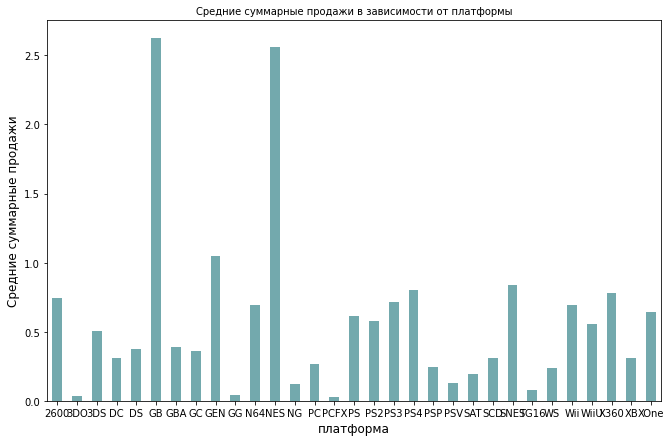

                                        data
platform temporary_segment                  
2600     количество игр с 1980 по 1990   107
3DO      количество игр с 1991 по 2000     3
3DS      количество игр с 2011 года      512
DC       количество игр с 1991 по 2000    41
         количество игр с 2001 по 2010     3
DS       количество игр с 1980 по 1990     1
         количество игр с 2001 по 2010  1935
         количество игр с 2011 года      184
GB       количество игр с 1980 по 1990    14
         количество игр с 1991 по 2000    64
GBA      количество игр с 1991 по 2000     1
         количество игр с 2001 по 2010   703
GC       количество игр с 2001 по 2010   520
GEN      количество игр с 1980 по 1990     1
         количество игр с 1991 по 2000    25
GG       количество игр с 1991 по 2000     1
N64      количество игр с 1991 по 2000   306
         количество игр с 2001 по 2010     1
NES      количество игр с 1980 по 1990    83
         количество игр с 1991 по 2000     8
NG       к

In [23]:
import seaborn as sns 
print(data['platform'].unique())
#зависимость суммарных продаж от платформы
plt.show()
data.groupby('platform')['sale_in_all_regions'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в зависимости от платформы', size=10)
plt.xlabel('платформа', size=12)
plt.ylabel('Средние суммарные продажи', size=12)

plt.show()



#вывдение для каждого жанра количества по рейтингу по количеству оценок игр
s = data.groupby(['platform' , 'temporary_segment']).agg(data=('platform', 'count'))
print(s)

При построении гистограммы наибольшие суммарные продажи по играм на платформах 'GB', 'NES', 'GEN','SNES','2600','PS4', 'PS3', Wii', 'X360', 'XONE'. Наименьшее количество продаж по играм на платформах 'GG', 'PCFX', '3DO'.
При просмотре сводной таблицы можно заметить закономерность. что большее количество игр по платформам, представленных в данных появились после 2000 года.(Небольшие значения с 1980 по 1990 гг до 10 по играм каждой платформе, но есть исключения). Рассмотри самые популярные. Наибольшее количество игр по платформе 'GB'c 1991 по 2000 гг. После 2000 года не встречается в продаже. Большее количеств игр по платформе 'NES' была популярна с 1980 по 1990 г. После 2000 г. не встречается. При этом игры на платформе PS3 и PS4 были выпущены с 2001 по 2016 гг. Получается, что игры, на платформах, имеющие наибольшие продажи были выпущены с 1980 по 2000 гг. 


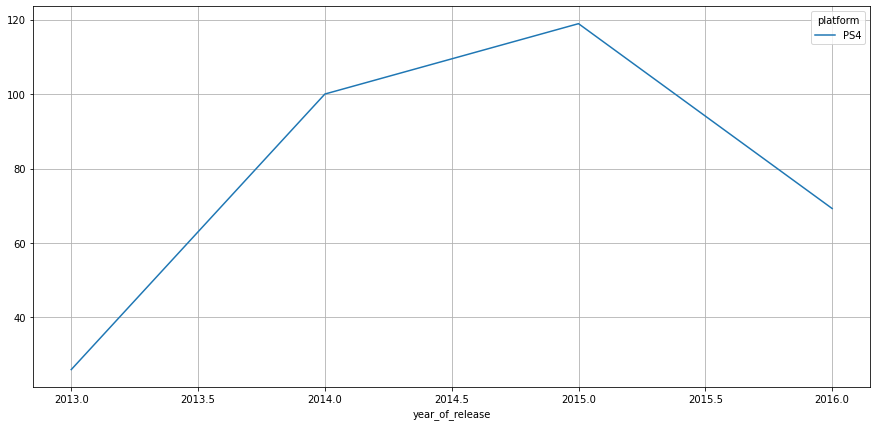

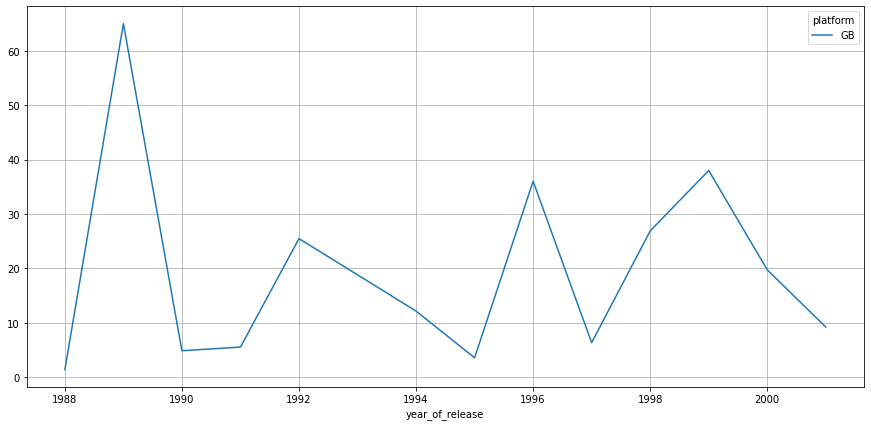

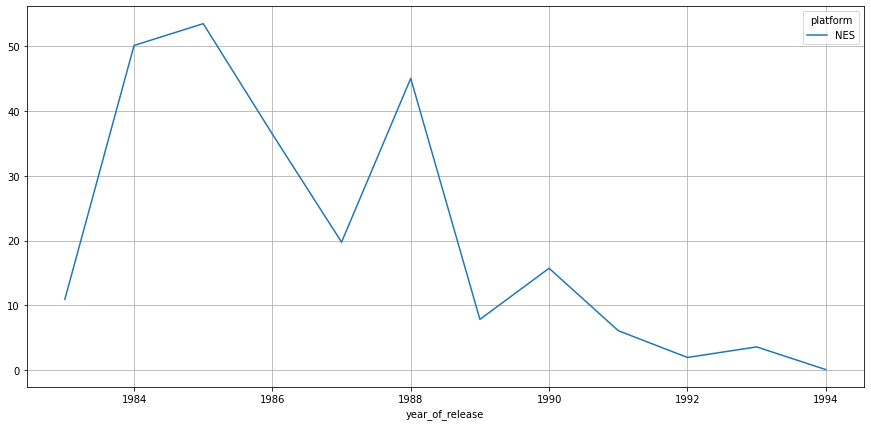

In [24]:
#PS4
# Построим график распределения суммарных продаж по годам реализации игр на платформе PS4
ps4 = data.query("platform == ['PS4']")
ps4.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#GB
# Построим график распределения суммарных продаж по годам реализации игр на платформе # Построим график распределения суммарных продаж по годам реализации игр на платформе GB
gb = data.query("platform == ['GB']")
gb.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#NES
# Построим график распределения суммарных продаж по годам реализации игр на платформе # Построим график распределения суммарных продаж по годам реализации игр на платформе GB
nes = data.query("platform == ['NES']")
nes.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()



Я буду использовать данные за период с 2005 гг. по 2016 г, так как я считаю, что для прогнозирования данных нужны необходимы актуальные сведения. Поэтому для исследования я возьму игры только по платформам, имеющие наибольшие продажи, но при этом выпускающиеся в актуальный период. Это: 'PS4', 'PS3', 'WII', 'X360', 'XONE'.

Я буду использовать данные за период с 2012 гг. по 2016 г, так как я считаю, что для прогнозирования данных нужны необходимы актуальные сведения. Поэтому для исследования я возьму игры только по платформам, имеющие наибольшие продажи, но при этом выпускающиеся в актуальный период. Это: 'PS4', 'PS3', 'WII', 'X360', 'XONE'.

(0.0, 10.0)

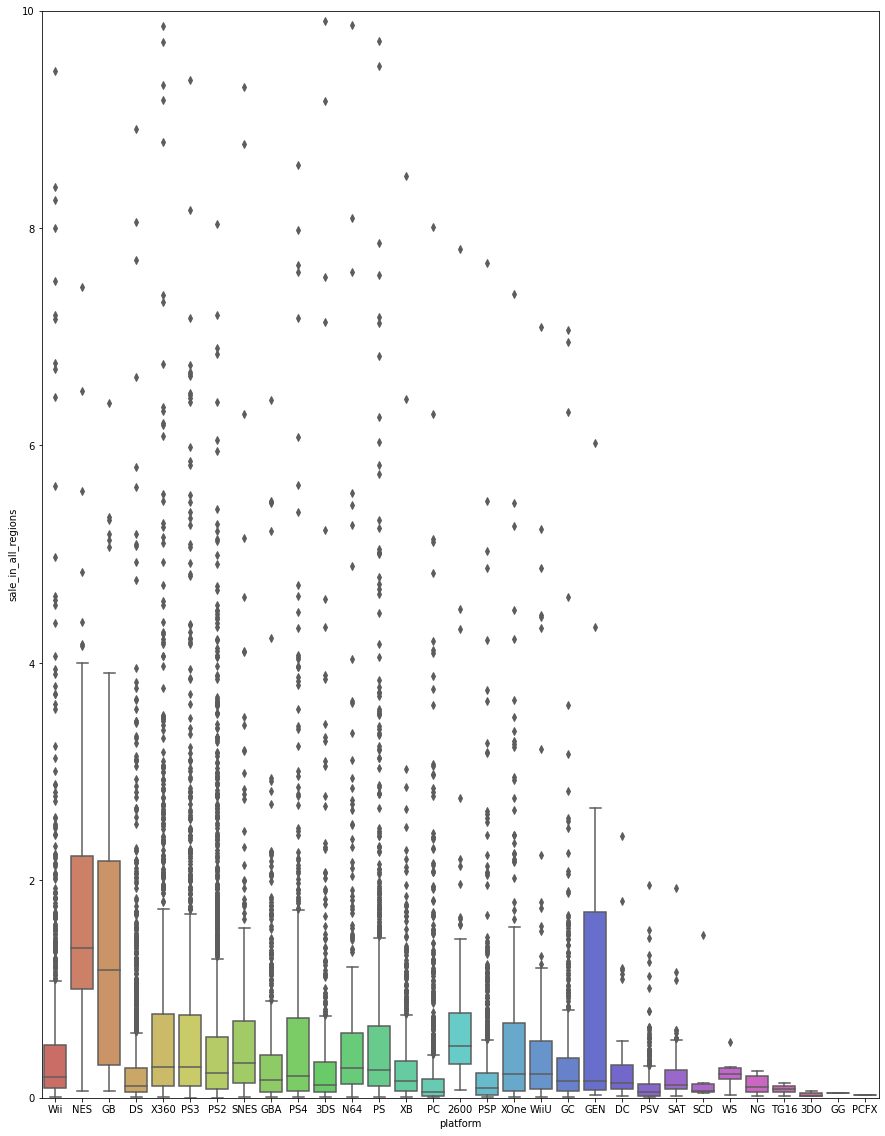

In [26]:
#построение ящика с усами

plt.figure(figsize=(15,20))
ax= sns.boxplot(x=data['platform'], y= data['sale_in_all_regions'], palette='hls')

ax.set_ylim([0, 10])

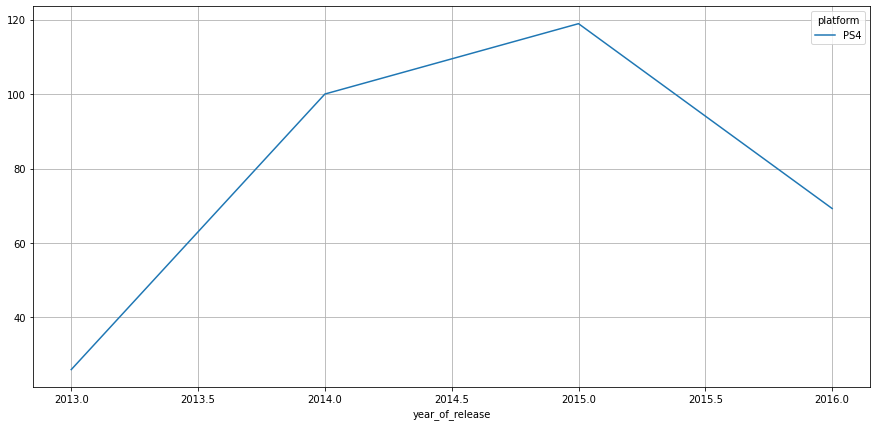

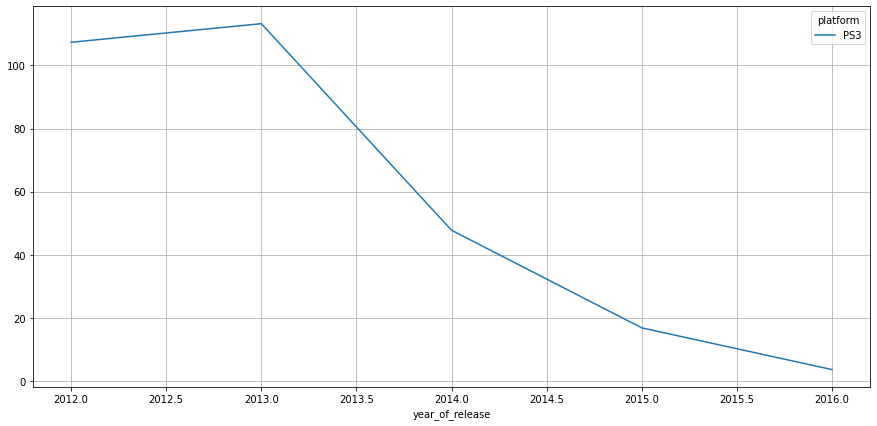

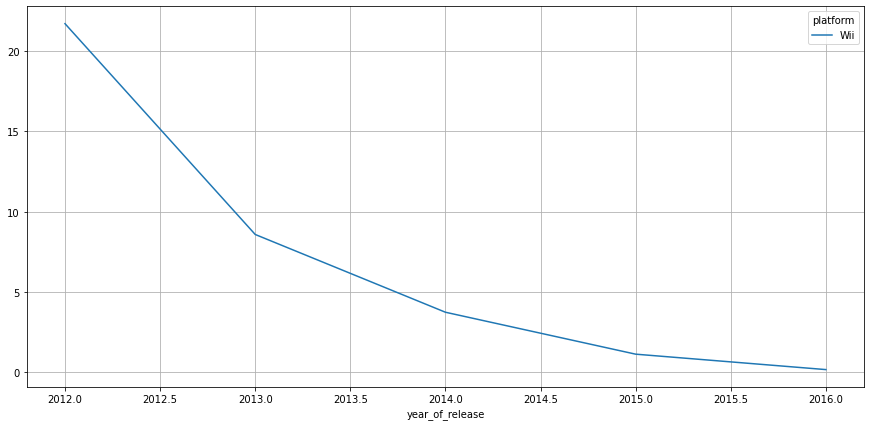

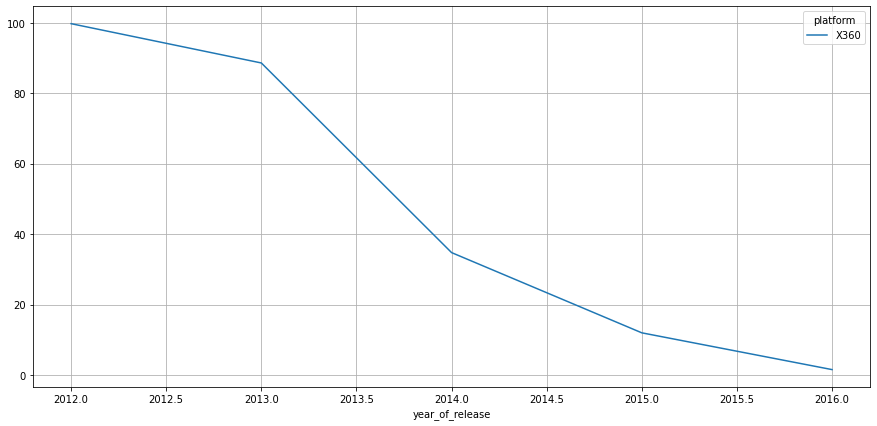

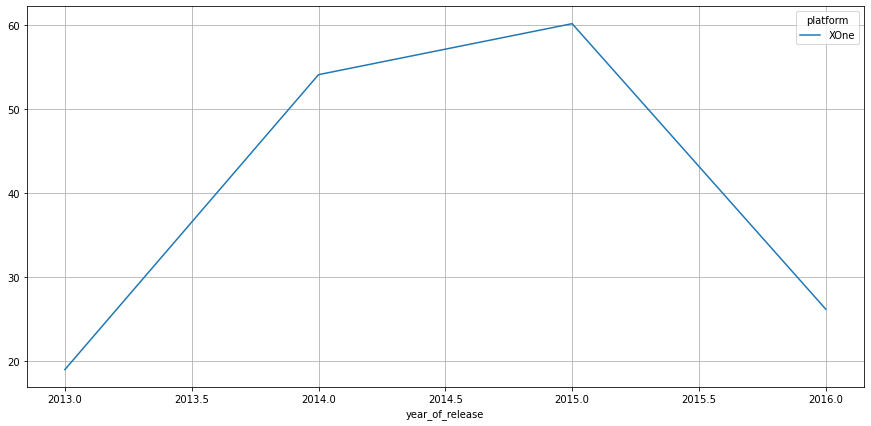

In [27]:
#PS4
# Построим график распределения суммарных продаж по годам реализации игр на платформе PS4
ps4 = data.query("platform == ['PS4'] & 2012 <= year_of_release")
ps4.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#PS3
# Построим график распределения суммарных продаж по годам реализации игр на платформе PS3
ps3 = data.query("platform == ['PS3'] & 2012 <= year_of_release")
ps3.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#Wii
# Построим график распределения суммарных продаж по годам реализации игр на платформе Wii
Wii = data.query("platform == ['Wii'] & 2012 <= year_of_release")
Wii.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#X360
# Построим график распределения суммарных продаж по годам реализации игр на платформе x360
X360 = data.query("platform == ['X360'] & 2012 <= year_of_release")
X360.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

#XONE
# Построим график распределения суммарных продаж по годам реализации игр на платформе XONE
XONE = data.query("platform == ['XOne'] & 2012 <= year_of_release")
XONE.pivot_table(index='year_of_release', columns = 'platform', values='sale_in_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.show()

При построении ящика с усами по суммарным продажам игр различных платформ можно увидеть выбросы среди игр с палтформами 'Wii', 'NES', 'GB', 'DS'. Игры по платформе 'PS4' в 2014 и 2015 гг были наибольшие суммарные продажи, при этом в 2015 были продажи выше, чем в 2014 Игры по платформе 'PS3' в 2012 и 2013 гг были наибольшие суммарные продажи, далее продажи идут на спад Игры по платформе 'Wii' в 2012 и 2013 гг были наибольшие суммарные продажи, приэтов в 2012 было больше суммарных продаж, чем в 2013 далее идет снижение суммарных продаж.Игры по платформе 'X360' в 2012 и 2013 гг были наибольшие суммарные продажи, далее идет снижение суммарных продажи. Игры по платформе 'XOne' в 2014 и 2015 гг были наибольшие суммарные продажи за  Из этого можно сделать вывод о том, что наиболее популярные игры с прогнозирозом продаж в 2017 г это игры на платформах 'PS4' и 'XOne'.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно выявила, согласен с тобой.
</div>

# 3.3 Изучение корреляции на платформе PS4

Корреляция суммарных продаж и рейтинга критиков -0.03362497596528878
Корреляция суммарных продаж и рейтинга пользователей 0.40589480145836687


<AxesSubplot:xlabel='critic_score'>

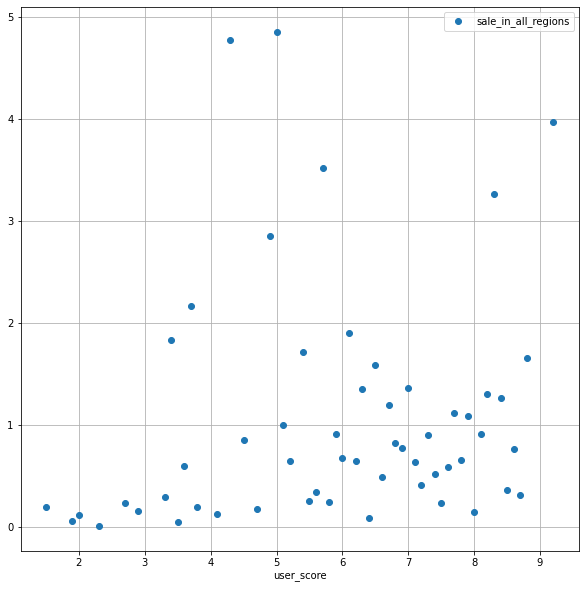

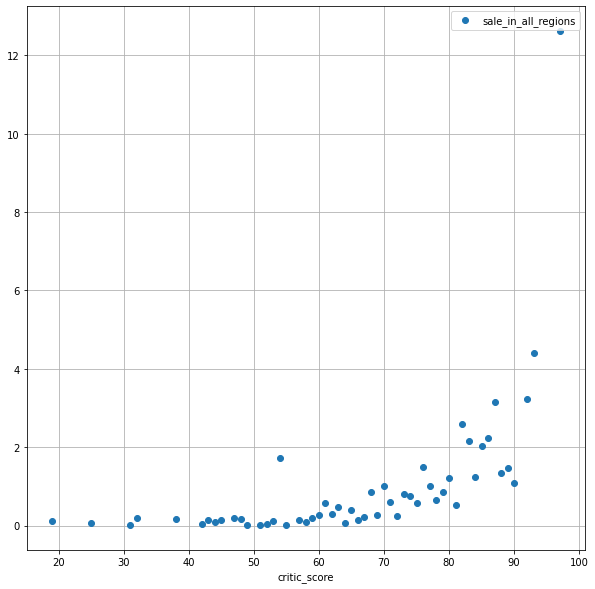

In [28]:
ps4 = data.query("platform == ['PS4'] & user_score != -10.0 & critic_score != -999.0")#платформа PS4 была реализована только в 2011 году, поэтому устанавливать актуальный период необязательно 

#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга критиков' , ps4['user_score'].corr(ps4['sale_in_all_regions']))

#выведение диаграммы рассеяния
ps4.pivot_table(index='user_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга пользователей' , ps4['critic_score'].corr(ps4['sale_in_all_regions']))

#выведение диаграммы рассеяния
ps4.pivot_table(index='critic_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

Корреляция суммарных продаж и рейтинга пользователей -0.09400318326920852
Корреляция суммарных продаж и рейтинга критиков 0.41042203561296375


<AxesSubplot:xlabel='critic_score'>

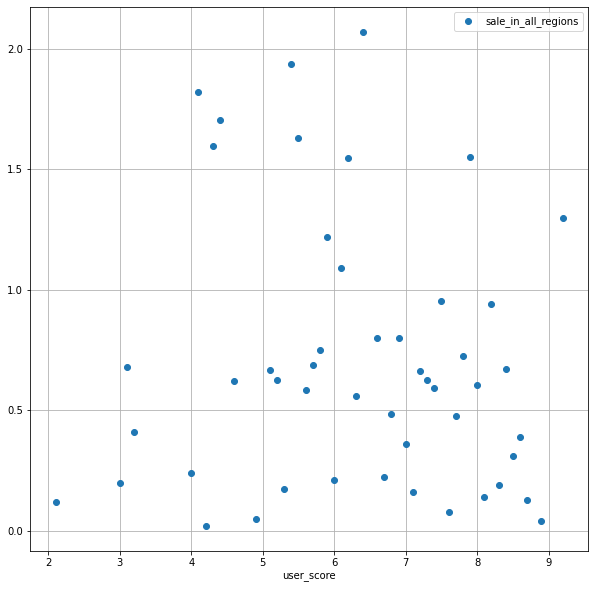

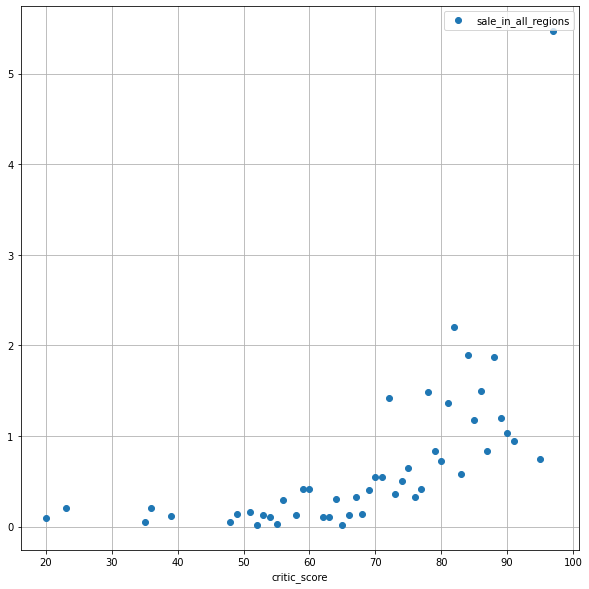

In [29]:

#XONE
XONE = data.query("platform == ['XOne'] & 2012 <= year_of_release & user_score != -10.0 & critic_score != -999.0")
#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга пользователей' , XONE['user_score'].corr(XONE['sale_in_all_regions']))

#выведение диаграммы рассеяния
XONE.pivot_table(index='user_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга критиков' , XONE['critic_score'].corr(XONE['sale_in_all_regions']))

#выведение диаграммы рассеяния
XONE.pivot_table(index='critic_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

Корреляция суммарных продаж и рейтинга пользователей -0.0020140394826897853
Корреляция суммарных продаж и рейтинга критиков 0.3605734888507336


<AxesSubplot:xlabel='critic_score'>

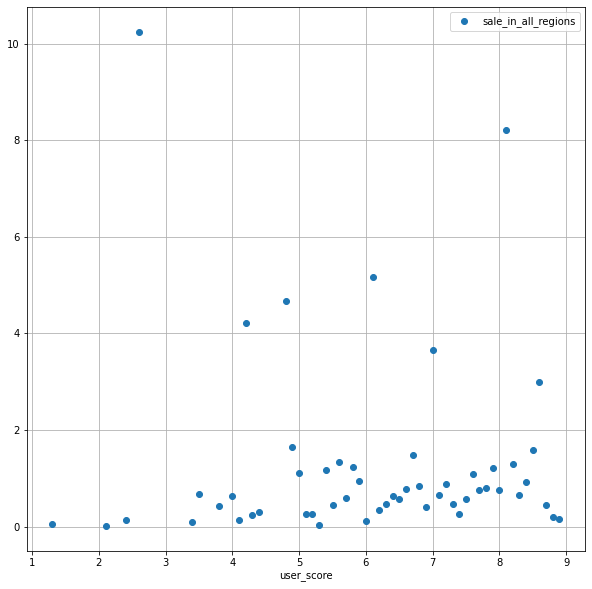

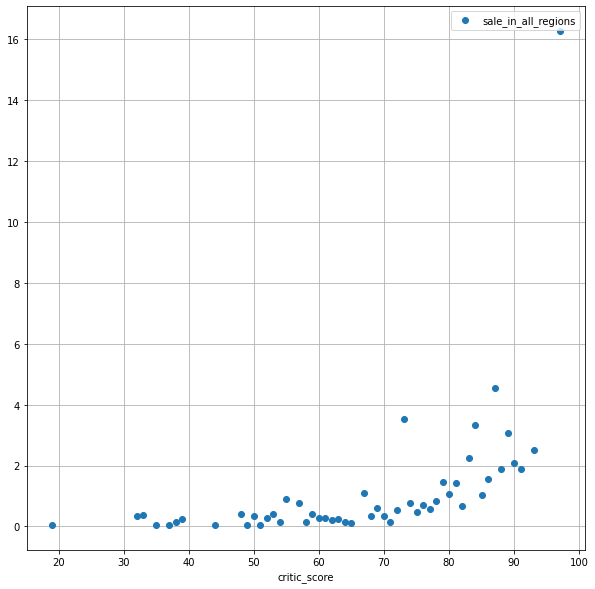

In [30]:
#X360
X360 = data.query("platform == ['X360'] & 2012 <= year_of_release & user_score != -10.0 & critic_score != -999.0")
#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга пользователей' , X360['user_score'].corr(X360['sale_in_all_regions']))

#выведение диаграммы рассеяния
X360.pivot_table(index='user_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

#вывод корреляции от рейтинга критиков и суммарных продаж
print('Корреляция суммарных продаж и рейтинга критиков' , X360['critic_score'].corr(X360['sale_in_all_regions']))

#выведение диаграммы рассеяния
X360.pivot_table(index='critic_score', values='sale_in_all_regions').plot(grid=True, style='o', figsize=(10, 10))

Корреляция зависимости суммарных продаж и оценки пользователя небольшая и отрицательная составляет -0,033 для игр платформы 'PS4'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,40 для игр платформы 'PS4'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для PS4. 
Корреляция зависимости для других платформ XBOX и X360 в акутальный период с 2012 по 2016 гг.
Корреляция зависимости суммарных продаж и оценки пользователя небольшая и отрицательная составляет -0,94 для игр платформы 'Xone'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,41 для игр платформы 'Xone'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для Xone.  
Корреляция зависимости суммарных продаж и оценки пользователя небольшая и в отличии от корреляционных значений для платформ PS4 и XONE составляет -0,02 и является отрицательной и небольшой для игр платформы 'X360'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,36 для игр платформы 'X360'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для X360. 

# 3.4 Параметр 'ЖАНР'

              data
genre             
Action        1031
Adventure      302
Fighting       109
Misc           192
Platform        85
Puzzle          28
Racing         115
Role-Playing   370
Shooter        235
Simulation      80
Sports         268
Strategy        71


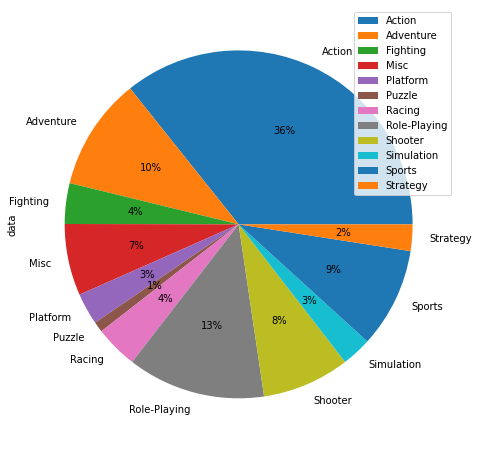

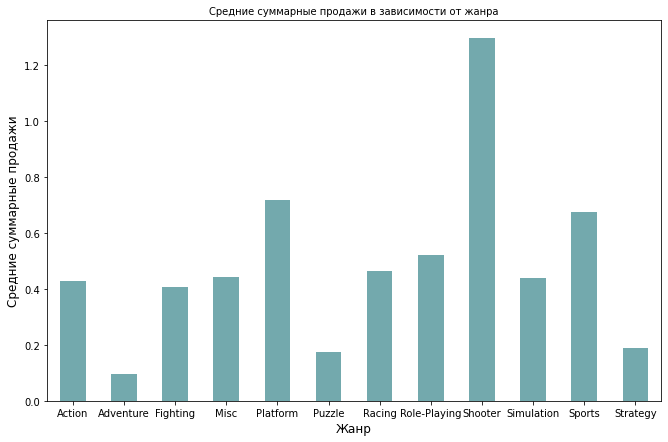

In [31]:
#создание таблицы с количеством игр в различных жанрах
genres = data.query(" 2012 <= year_of_release")
genres = genres.groupby('genre').agg(data=('genre', 'count'))
print(genres)
#создание диаграммы с процентным соотношением количества игр и 
genres.plot(y = 'data' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')

#cоздание гистограммы с рапределением игр в различных жанрах и суммарных продаж
plt.show()




Наибольшее количество игр в актуальный период, выпускаются в жанре 'Action'(36%). наибольшее количество игр, выпускаются в таких жанрах, как 'Action'(36%), 'Role-Playing'(13%),'Adventure'(10%), 'Sports'(9%), 'Shooter'(8%), . Наименьшее количество игр, выпускаемых в таких жанрах, как 'Puzzle'(1%),'Strategy'(2%) 'Simulation'(3%), 'Platform'(3%).
Наибольшие суммарные продажи игр в таких жанрах, как 'Shooter','Platform', 'Sports'. Наименьшие суммарные продажи 'Adventure', ''Puzzle','Strategy'.

# 4 Портрет  каждого региона

# 4.1 Продажи в Северной Америке

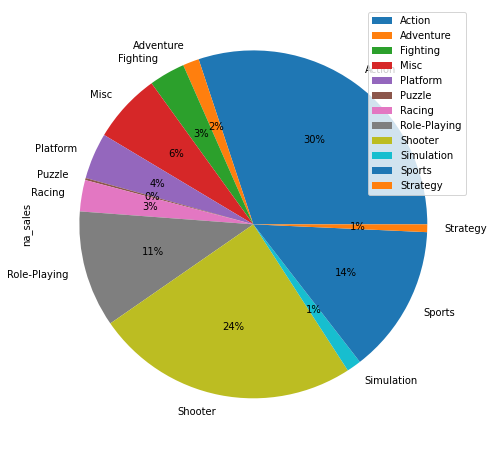

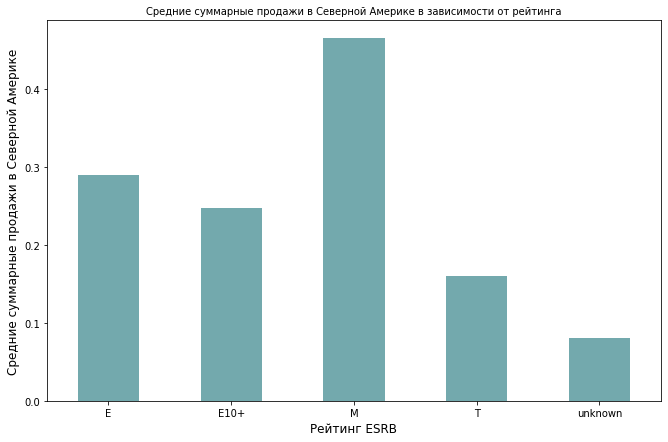

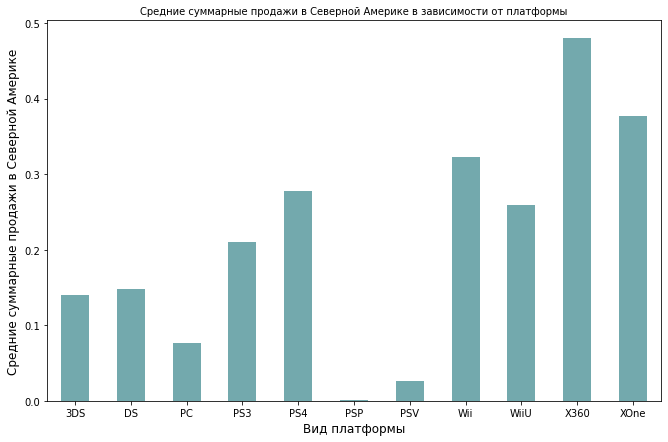

In [32]:
#Зависимость суммарных продаж в Северной Америке от жанра
#создание сводной таблицы
Na_genres = data.query(" 2012 <= year_of_release")
Na_genres = Na_genres.pivot_table(index ='genre', values = 'na_sales' ,  aggfunc = 'sum')
#создание диаграммы распределения продаж в Северной Америке по жанрам
Na_genres.plot(y = 'na_sales' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')

#зависимость суммарных продаж от рейтинга ESRB
plt.show()
Na_genre = data.query(" 2012 <= year_of_release")
Na_genre.groupby('rating')['na_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Северной Америке в зависимости от рейтинга', size=10)
plt.xlabel('Рейтинг ESRB', size=12)
plt.ylabel('Средние суммарные продажи в Северной Америке', size=12)

plt.show()


#зависимость суммарных продаж в Северной Америке и платформ
plt.show()
Na_genre.groupby('platform')['na_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Северной Америке в зависимости от платформы', size=10)
plt.xlabel('Вид платформы', size=12)
plt.ylabel('Средние суммарные продажи в Северной Америке', size=12)

plt.show()


Топ 5 жанров игр с большими продажами в Северной Америке:
1.'Action'(30%)
2.'Shooter'(24%)
3.'Sports'(14%)
4.'Role Playng'(11%)
5.'Misk'(6%)
Топ 5 платформ с большими продажами в Северной Америке
1.'X360'
2.'Xone'
3.'Wii'
4.'PS4'
5.'WiiU'
Наибольшие продажи в Северной Америке с рейтингом "M", и 'E' "E10". Наименьшие продажи в Северной Америке с рейтингом "unknown" т.е. значения пропущены, "Puzzle", на платформе "PSP".  Также имеется часть значений на рейтинга которые неизвестны, то есть были пропущены. Суммарные продажи по пропущенным значениям в рейтинге наименьшие суммарные продажи.

# 4.2 Продажи в Европе

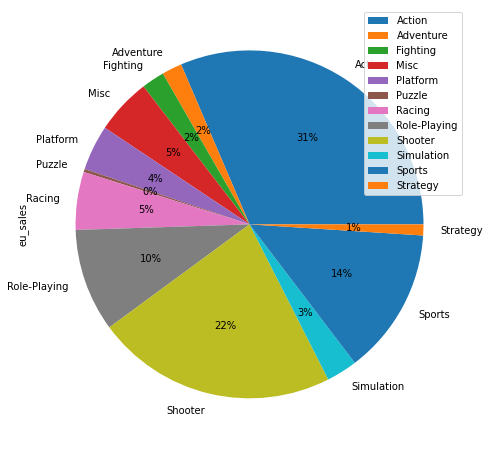

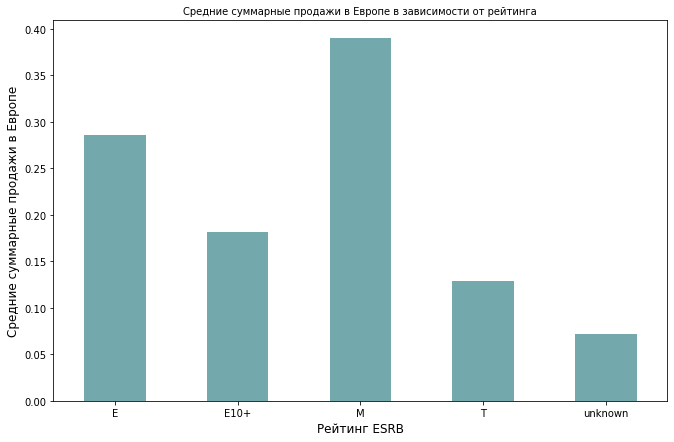

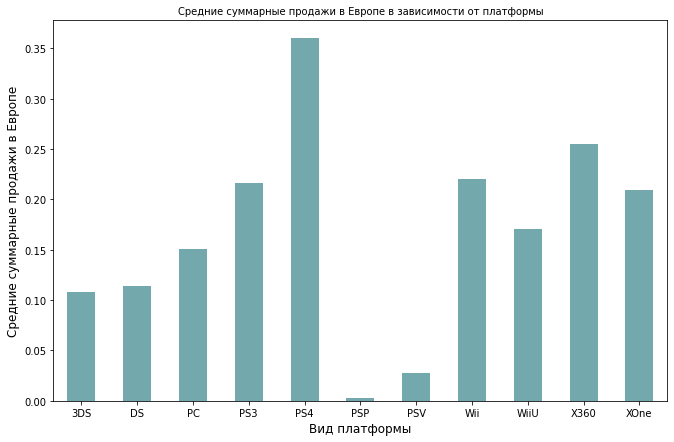

In [33]:
#Зависимость суммарных продаж в Европе от жанра
#создание сводной таблицы
EU_genres = data.query("2012 <= year_of_release")
EU_genres = EU_genres.pivot_table(index ='genre', values = 'eu_sales' ,  aggfunc = 'sum')
#создание диаграммы распределения продаж в Северной Америке по жанрам
EU_genres.plot(y = 'eu_sales' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')

#зависимость суммарных продаж от рейтинга ESRB
plt.show()
EU_genre = data.query(" 2012 <= year_of_release")
EU_genre.groupby('rating')['eu_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Европе в зависимости от рейтинга', size=10)
plt.xlabel('Рейтинг ESRB', size=12)
plt.ylabel('Средние суммарные продажи в Европе', size=12)

plt.show()


#зависимость суммарных продаж в Европе и платформ
plt.show()
EU_genre.groupby('platform')['eu_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Европе в зависимости от платформы', size=10)
plt.xlabel('Вид платформы', size=12)
plt.ylabel('Средние суммарные продажи в Европе', size=12)

plt.show()


Топ 5 жанров игр с большими продажами в Европе:
1.'Action'(31%)
2.'Shooter'(22%)
3.'Sports'(14%)
4.'Role playng'(10%)
5.'Racing', 'Misk'(5%)
Топ 5 платформ с большими продажами в Европе:
1.'PS4'
2.'X360'
3.Wii'
4.'PS3'
5.'XONE'
Наибольшие продажи в Европе с рейтингом "M", "E", "E10", на платформе "PS4', в жанре 'Action'. Наименьшие продажи в Европе с рейтингом "EC","RP" "Strategy" и 'Puzzle', на платформе "Unknown". При этом неизвестные значения в рейтинге  суммарных продаж наименьшие суммарные продажи в рейтинге, чем остальные оценки в рейтинге, о составляют значительную часть данных

<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> Аналогичные комментарии, что и выше. По построению графиков и расчетов все верно.

# 4.3 Продажи в Японии

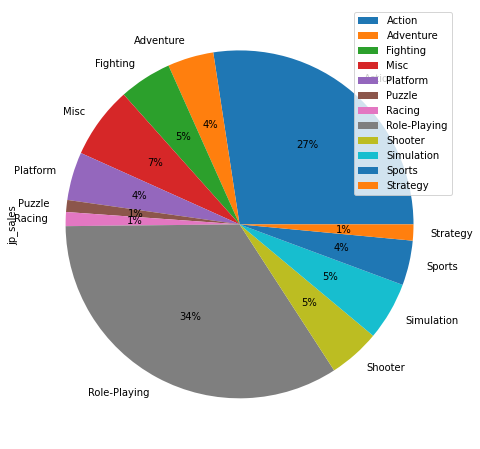

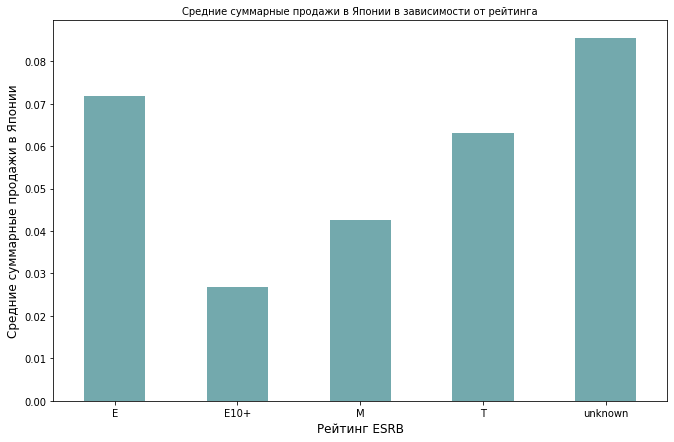

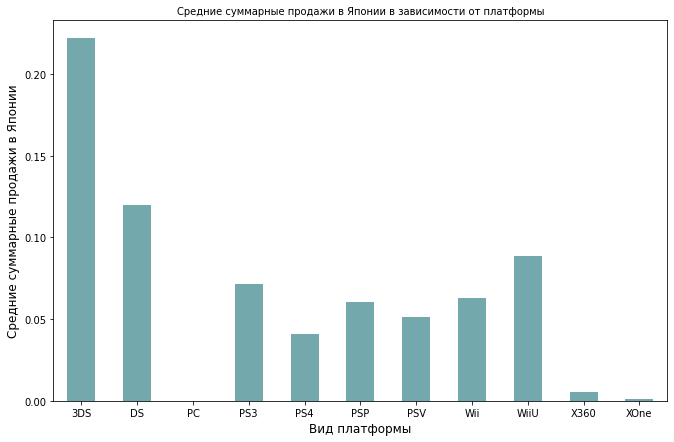

In [34]:
#Зависимость суммарных продаж в Японии от жанра
#создание сводной таблицы

JP_genres = data.query("2012 <= year_of_release")
JP_genres = JP_genres.pivot_table(index ='genre', values = 'jp_sales' ,  aggfunc = 'sum')
#создание диаграммы распределения продаж в Северной Америке по жанрам
JP_genres.plot(y = 'jp_sales' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')

#зависимость суммарных продаж от рейтинга ESRB
plt.show()
JP_genre = data.query("2012 <= year_of_release")
JP_genre.groupby('rating')['jp_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Японии в зависимости от рейтинга', size=10)
plt.xlabel('Рейтинг ESRB', size=12)
plt.ylabel('Средние суммарные продажи в Японии', size=12)

plt.show()


#зависимость суммарных продаж в Японии и платформ
plt.show()
JP_genre.groupby('platform')['jp_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в Японии в зависимости от платформы', size=10)
plt.xlabel('Вид платформы', size=12)
plt.ylabel('Средние суммарные продажи в Японии', size=12)

plt.show()

Топ 5 жанров игр с большими продажами в Японии: 1.'Role Playng'(34%) 2.'Action'(27%) 3.'Misk'(7%) 4.'Simylation', 'Shooter', 'Figting'(5%) 5. 'Platform', 'Sports', Adventure(4%)  Топ 5 платформ с большими продажами в Европе: 1.'3DS 2.'DS' 3.'WiiU' 4.'PS3' 5.'PSP' Наибольшие продажи в Японии с рейтингом "Unknown", "Role Playng", на платформе "3DS". Наименьшие продажи в Японии с рейтингом с значениями, в которых имеются пропуски,"E10",   по жанрам "Strategy",'Puzzles', 'Racing', на платформе "PC".

В Северной Америке и Европе пользуются популярностью жанр игр'Action'. а в Японии Role-Playng в актуальный период. Наименьшее количество суммарных продаж в жанре "Strategy" во всех реионах. Наибольшие суммарные продажи в Северной Америке и Европе по рейтингу АО, в Японии рейтинг неизвестен, так как большее количество пропущенных значений в рейтинге среди продаж в Японии. При этом рейтинг АО в Японии имеет наименьшее количество продаж. Самыt популярные игры в Северной Америке на платформе X360, в Европе это PS4,  а в Японии 3DS.
  
  Рейтинг ERSB вероятно не оказывает влияние на продажи в Японии, или там есть другие рейтинговые системы.

# 4.4 Продажи в других регионах

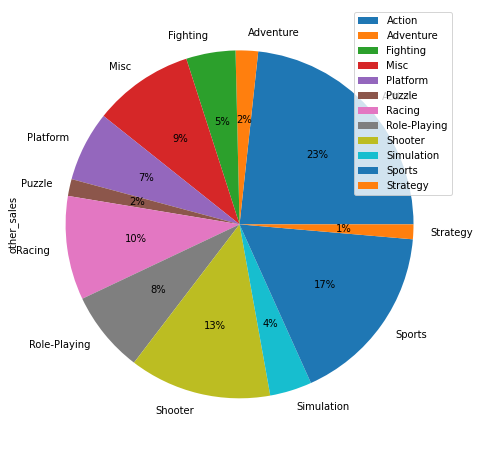

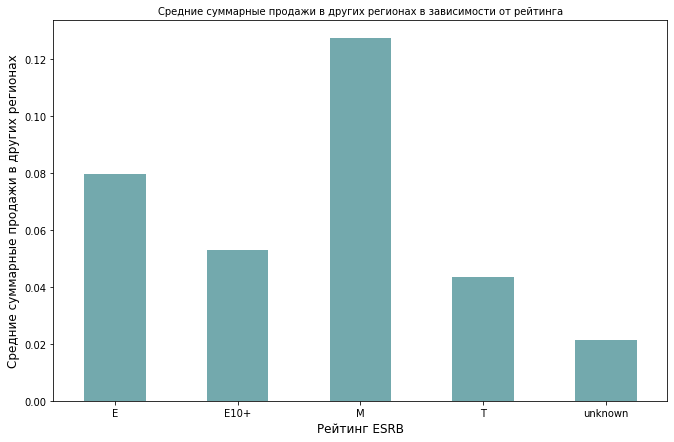

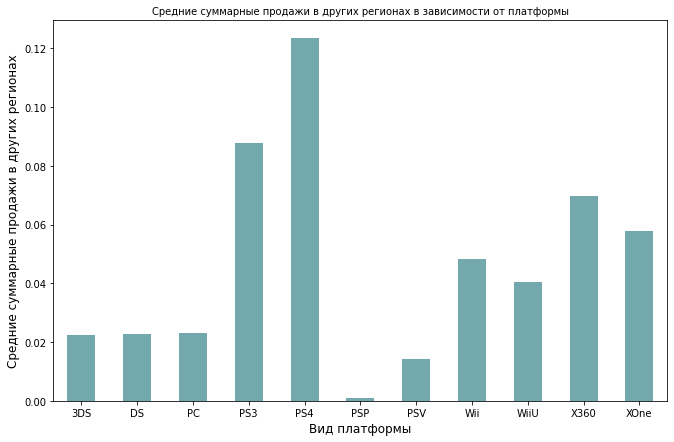

In [35]:
#Зависимость суммарных продаж в других регионах от жанра
#создание сводной таблицы

Other_genres = data.query("2012 <= year_of_release")
Other_genres = data.pivot_table(index ='genre', values = 'other_sales' ,  aggfunc = 'sum')
#создание диаграммы распределения продаж в других регионах по жанрам
Other_genres.plot(y = 'other_sales' , kind = 'pie', figsize = (8, 8) , autopct = '%1.0f%%')

#зависимость суммарных продаж от рейтинга ESRB
plt.show()
Other_genre = data.query("2012 <= year_of_release")
Other_genre.groupby('rating')['other_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в других регионах в зависимости от рейтинга', size=10)
plt.xlabel('Рейтинг ESRB', size=12)
plt.ylabel('Средние суммарные продажи в других регионах', size=12)

plt.show()


#зависимость суммарных продаж в других регионах и платформ
plt.show()
Other_genre.groupby('platform')['other_sales'].mean().plot(kind='bar', figsize=(11, 7), color='#73A9AD')

plt.xticks(rotation=0)
plt.title('Средние суммарные продажи в других регионах в зависимости от платформы', size=10)
plt.xlabel('Вид платформы', size=12)
plt.ylabel('Средние суммарные продажи в других регионах', size=12)

plt.show()

Топ 5 жанров игр с большими продажами в других регионах:
1.'Action'(23%)
2.'Sports'(17%)
3.'Shooter'(13%)
4.'Racing'(10%)
5.'Misk'(9%)

Топ 5 платформ с большими продажами в других регионах:
1.'PS4'
2.'PS3'
3.'PS2'
4.'X360'
5.'XONE'
Наибольшие продажи в других регионах с рейтингом "E",'M' "Action", на платформе "PS4". Наименьшее количество продаж в других регионах с рейтингом "unknown", "Strategy", на платформе "PSP".

# 6. Проверка гипотез по платформам

In [36]:
from scipy import stats as st

In [37]:

XBOX_ONE = data.loc[(data['platform'] == 'XOne') & (data['user_score'] != -10.0) & (2012 <= data['year_of_release']),'user_score']
PC = data.loc[(data['platform'] == 'PC') & (data['user_score'] != -10.0) & (2012 <= data['year_of_release']),'user_score']

In [38]:
XBOX_ONE

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [39]:
results = st.ttest_ind(XBOX_ONE, PC, equal_var = False)# results = вызов метода для проверки гипотезы

# alpha = задайте значение уровня значимости
alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Исходя из описания проекта необходимо проверить гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". За нулевую гипотезу я взяла "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная сформулирована наоборот. Так как за нулевую гипотезу я взяла гипотезу с равенством, так как распределение строится на основании предположения, что базовая нулевая теория верна. Уровень статистической значимости 5 %. Исходя из исследования нулевую гипотезу не получилось отврегнуть. Поэтому средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

# 7. Проверка гипотез по жанрам

In [40]:
ACTION = data.loc[(data['genre'] == 'Action') & (data['user_score'] != -10.0) & (2012 <= data['year_of_release']),'user_score']
SPORTS = data.loc[(data['genre'] == 'Sports') & (data['user_score'] != -10.0) & (2012 <= data['year_of_release']),'user_score']

In [41]:
results = st.ttest_ind(ACTION, SPORTS, equal_var = False)# results = вызов метода для проверки гипотезы

# alpha = задайте значение уровня значимости
alpha = 0.05
print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# вывод значения p-value на экран 
# условный оператор с выводом строки с ответом

4.24307776572644e-20
Отвергаем нулевую гипотезу


Исходя из описания проекта необходимо проверить гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". За нулевую гипотезу я взяла "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". Альтернативная сформулирована наоборот. Так как за нулевую гипотезу я взяла гипотезу с равенством, так как распределение строится на основании предположения, что базовая нулевая теория верна. Уровень статистической значимости 5 %. Исходя из исследования нулевая гипотеза была отвергнута. Поэтому средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


# Общий вывод

Общий вывод

Параметр год реализации.

Наибольшее количество игр в актуальный период, выпускаются в жанре 'Action'(23%). наибольшее количество игр, выпускаются в таких жанрах, как 'Action'(23%), 'Sports'(12%), 'Misc'(12%), 'Role-Playing'(9%). Наименьшее количество игр, выпускаемых в таких жанрах, как 'Puzzle'(4%), 'Fighting'(4%), 'Platform'(4%), 'Fighting'(4%).
Наибольшие суммарные продажи игр в таких жанрах, как 'Platform', 'Shooter', 'Sports'. Наименьшие суммарные продажи 'Adventure', 'Strategy'.
 
 Параметр платформы
 
 При построении гистограммы наибольшие суммарные продажи по играм на платформах 'GB', 'NES', 'GEN','SNES','2600','PS4', 'PS3', Wii', 'X360', 'XONE'. Наименьшее количество продаж по играм на платформах 'GG', 'PCFX', '3DO'. При просмотре сводной таблицы можно заметить закономерность. что большее количество игр по платформам, представленных в данных появились после 2000 года.(Небольшие значения с 1980 по 1990 гг до 10 по играм каждой платформе, но есть исключения). Рассмотри самые популярные. Наибольшее количество игр по платформе 'GB'c 1991 по 2000 гг. После 2000 года не встречается в продаже. Большее количеств игр по платформе 'NES' была популярна с 1980 по 1990 г. После 2000 г. не встречается. При этом игры на платформе PS3 и PS4 были выпущены с 2001 по 2016 гг. Получается, что игры, на платформах, имеющие наибольшие продажи были выпущены с 1980 по 2000 гг.

Я буду использовать данные за период с 2012 по 2016  гг., так как я считаю, что для прогнозирования данных нужны необходимы актуальные сведения. Поэтому для исследования я возьму игры только по платформам, имеющие наибольшие продажи, но при этом выпускающиеся в актуальный период. Это: 'PS4', 'PS3', 'WII', 'X360', 'XONE'.

При построении ящика с усами по суммарным продажам игр различных платформ можно увидеть выбросы среди игр с палтформами 'Wii', 'NES', 'GB', 'DS'. Игры по платформе 'PS4' в 2014 и 2015 гг были наибольшие суммарные продажи, при этом в 2015 были продажи выше, чем в 2014 Игры по платформе 'PS3' в 2012 и 2013 гг были наибольшие суммарные продажи, далее продажи идут на спад Игры по платформе 'Wii' в 2012 и 2013 гг были наибольшие суммарные продажи, приэтов в 2012 было больше суммарных продаж, чем в 2013 далее идет снижение суммарных продаж.Игры по платформе 'X360' в 2012 и 2013 гг были наибольшие суммарные продажи, далее идет снижение суммарных продажи. Игры по платформе 'XOne' в 2014 и 2015 гг были наибольшие суммарные продажи за  Из этого можно сделать вывод о том, что наиболее популярные игры с прогнозирозом продаж в 2017 г это игры на платформах 'PS4' и 'XOne'.

Корреляция зависимости для других платформ Xone и X360 в акутальный период с 2012 по 2016 гг.

Корреляция зависимости суммарных продаж и оценки пользователя небольшая и отрицательная составляет -0,94 для игр платформы 'Xone'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,41 для игр платформы 'Xone'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для Xone.  
Корреляция зависимости суммарных продаж и оценки пользователя небольшая  составляет -0,02 и является отрицательной и небольшой для игр платформы 'X360'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,36 для игр платформы 'X360'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для X360. 

Параметр жанра игры.

Наибольшее количество игр в актуальный период, выпускаются в жанре 'Action'(36%). наибольшее количество игр, выпускаются в таких жанрах, как 'Action'(36%), 'Role-Playing'(13%),'Adventure'(10%), 'Sports'(9%), 'Shooter'(8%), . Наименьшее количество игр, выпускаемых в таких жанрах, как 'Puzzle'(1%),'Strategy'(2%) 'Simulation'(3%), 'Platform'(3%).
Наибольшие суммарные продажи игр в таких жанрах, как 'Shooter','Platform', 'Sports'. Наименьшие суммарные продажи 'Adventure', ''Puzzle','Strategy'.
Корреляция зависимости от популярной платформы 'PS4' и других платформ ('XONE', 'X360')
Корреляция зависимости суммарных продаж и оценки пользователя небольшая и отрицательная составляет -0,033 для игр платформы 'PS4'. На диаграмме рассеяния видно, что особой зависимости между оценкой пользователя и суммарными продажами не наблюдается. Корреляция зависимости суммарных продаж и оценки критиков оставляет 0,40 для игр платформы 'PS4'. На диаграмме рассеяния видно, что наблюдается зависимость между оценкой критиков и суммарными продажами, чем больше оценка критиков, тем больше суммарные продажи для PS4. 



Портрет каждого региона

Продажи в Северной Америке
Топ 5 жанров игр с большими продажами в Северной Америке:
1.'Action'(30%)
2.'Shooter'(24%)
3.'Sports'(14%)
4.'Role Playng'(11%)
5.'Misk'(6%)
Топ 5 платформ с большими продажами в Северной Америке
1.'X360'
2.'Xone'
3.'Wii'
4.'PS4'
5.'WiiU'
Наибольшие продажи в Северной Америке с рейтингом "M", и 'E' "E10". Наименьшие продажи в Северной Америке с рейтингом "unknown" т.е. значения пропущены, "Puzzle", на платформе "PSP".  Также имеется часть значений на рейтинга которые неизвестны, то есть были пропущены. Суммарные продажи по пропущенным значениям в рейтинге наименьшие суммарные продажи.

Продажи в Европе

Топ 5 жанров игр с большими продажами в Европе:
1.'Action'(31%)
2.'Shooter'(22%)
3.'Sports'(14%)
4.'Role playng'(10%)
5.'Racing', 'Misk'(5%)
Топ 5 платформ с большими продажами в Европе:
1.'PS4'
2.'X360'
3.Wii'
4.'PS3'
5.'XONE'
Наибольшие продажи в Европе с рейтингом "M", "E", "E10", на платформе "PS4', в жанре 'Action'. Наименьшие продажи в Европе с рейтингом "EC","RP" "Strategy" и 'Puzzle', на платформе "Unknown". При этом неизвестные значения в рейтинге  суммарных продаж наименьшие суммарные продажи в рейтинге, чем остальные оценки в рейтинге, о составляют значительную часть данных

Продажи в Японии

Топ 5 жанров игр с большими продажами в Японии: 1.'Role Playng'(34%) 2.'Action'(27%) 3.'Misk'(7%) 4.'Simylation', 'Shooter', 'Figting'(5%) 5. 'Platform', 'Sports', Adventure(4%)  Топ 5 платформ с большими продажами в Европе: 1.'3DS 2.'DS' 3.'WiiU' 4.'PS3' 5.'PSP' Наибольшие продажи в Японии с рейтингом "Unknown", "Role Playng", на платформе "3DS". Наименьшие продажи в Японии с рейтингом с значениями, в которых имеются пропуски,"E10",   по жанрам "Strategy",'Puzzles', 'Racing', на платформе "PC".

В Северной Америке и Европе пользуются популярностью жанр игр'Action'. а в Японии Role-Playng в актуальный период. Наименьшее количество суммарных продаж в жанре "Strategy" во всех реионах. Наибольшие суммарные продажи в Северной Америке и Европе по рейтингу АО, в Японии рейтинг неизвестен, так как большее количество пропущенных значений в рейтинге среди продаж в Японии. При этом рейтинг АО в Японии имеет наименьшее количество продаж. Самыe популярные игры в Северной Америке на платформе X360, в Европе это PS4,  а в Японии это '3DC'.

  Рейтинг ERSB вероятно не оказывает влияние на продажи в Японии, или там есть другие рейтинговые системы.
 
Проверка гипотез
 
 При проверке гипотез я воспользовалась t - тестом для сравнения двух средних генеральных совокупностей.

Да, и лучше делать вывод о равенстве средних по выборкам из обеих совокупностей.
В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var).

 
Исходя из описания проекта необходимо проверить гипотезу: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". За нулевую гипотезу я взяла "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Альтернативная сформулирована наоборот. Так как за нулевую гипотезу я взяла гипотезу с равенством, так как распределение строится на основании предположения, что базовая нулевая теория верна. Уровень статистической значимости 5 %. Исходя из исследования нулевую гипотезу не получилось отврегнуть. Поэтому средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из описания проекта необходимо проверить гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные". За нулевую гипотезу я взяла "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые". Альтернативная сформулирована наоборот. Так как за нулевую гипотезу я взяла гипотезу с равенством, так как распределение строится на основании предположения, что базовая нулевая теория верна. Уровень статистической значимости 5 %. Исходя из исследования нулевая гипотеза была отвергнута. Поэтому средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
